# **Supplementary material - Part II**  
*Sectoral marginal abatement cost curves: a practical tool for evaluating the cost-efficiency of air transport decarbonisation scenarios*

This notebook supports the main article, referenced above. It was used to generate the various plots and analyses presented in the article.  
It also contains additional plots and analyses.  

**The notebook is given here a a static PDF. However, it is ehanced if run afetr AeroMAPS install https://github.com/AeroMAPS/AeroMAPS.**

### Imports and settings

In [1]:
import matplotlib.pyplot as plt

# import pandas as pd
# import numpy as np
import copy

%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    default_models_bottom_up,
    models_abatements_cost,
    models_production_cost,
)

plt.rc("hatch", linewidth=1)

# 1 - Scenario initialisation and settings

The first phase corresponds to running a first, central scenario with AeroMAPS. 

In [2]:
models = {
    "default_models_bottom_up": default_models_bottom_up,
    "models_abatements_cost": models_abatements_cost,
    "models_production_cost": models_production_cost,
}

In [3]:
process = create_process(
    configuration_file="./data/base/config_base_scenario.json",
    models=copy.deepcopy(models),
)

⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.


## 1-a) Air traffic evolution

As of April 2024, AeroMAPS is considering an exgenous growth rate.
For the purposes of this article, an uniform growth rate of 3% is set. This is significantly lower from industry prospects such as [Airbus GMF: 3.6%](https://www.airbus.com/en/products-services/commercial-aircraft/market/global-market-forecast) or [Boeing CMO: 3.8%](https://www.boeing.com/content/dam/boeing/boeingdotcom/market/assets/downloads/CMO_2022_Report_FINAL_v02.pdf), but higher than [IEA Net Zero: 2.1% (2019 as base year)](https://www.iea.org/reports/net-zero-roadmap-a-global-pathway-to-keep-the-15-0c-goal-in-reach).


In [4]:
## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = []
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

## 1-b) Aircraft fleet

**Hypotheses considered for aircraft DOC and new aircraft introduction:**
The previously defined air traffic is flown by the default AeroMAPS fleet, and new aircraft. 

- A default fleet: an "old" and a "recent" aircraft for three markets: Short (<1500 km), Medium (1500-4000 km) and Long Range (>4000 km). 
- New aircraft are introduced
    - <u>Short Range:</u>
        - Hydrogen aircraft in 2035
    - <u>Medium Range:</u>
        - Drop-in aircraft in 2030
        - Hydrogen aircraft in 2045  
    - <u>Long Range:</u>
        - Drop-in aircraft in 2030
        - Drop-in aircraft in 2045
        
    - Efficiency assumptions: drop in aircraft introduced in 2030 use 20% less energy than the current ("recent"), the second long-range dropin aircraft introduced in 2045 uses 30% less energy than the "recent. Hydrogen aircraft uses the same ammount of energy than the recent aircraft.
    - Aircraft RC and NRC cost assumption are based on [this article](https://www.eucass.eu/doi/EUCASS2023-593.pdf), but these parameter are not used in this article. There is currently <u>no automated link between RC+NRC and DOC on AeroMAPS </u>. Consistent values are filed nevertheless. Same for ASK per year per A/C.
    
    
    - Aircraft DOC are obtained using the same article and regrouped in two categories
        - DOC-ENERGY is computed using the energy consumption of the aircraft and the MFSP of the corresponding energy (see below). 
        - DOC-NON-ENERGY encompass all other direct operating Costs (Navigation, FA/Pilots, MRO,...). AeroMAPS requires the evolution of this parameter compared to the reference. For  information, the capital part represent around 16% of the total DOC-NE and other costs 84%. A composite evolution can therefore be computed. The capital part is obtained (outside of AeroMAPS) by computing an equivalent annual cost (**EAC**), using an annuity factor of 0.07 (computed for 25 years, under a 5% Interest rate). It can be modified to represent a increase in aircraft cost or lifespan. ($\text{EAC} = \frac{CAP_{t0} \times i}{1 - (1 + i)^{-n}} $). For the time being, the DOC-NE of drop-,n aircraft is left unchanged, and the DOC NE of both hydrogen aircraft is set at 106% and 110% of the basis according to [Hoelzen et al.](https://www.sciencedirect.com/science/article/pii/S0360319921043184#fig2)
        
    
    
- Aircraft fleet renewal rates are set to 25 years. It corresponds to both the aircraft life and the duration necessary to renew the whole fleet with current fleet renewal models of AeroMAPS.






It is possible to visualize the resuting compostion of the fleet on the three segments defined.

Short Range (life=25y, limit=2, subcategories=1, share_sum=100.0%)
  - SR conventional narrow-body (share=100.0%, aircraft=1)
    - old reference (EIS=1970 y, energy/ASK=1.2472568306010927 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2009.0045994444736 y, energy/ASK=0.9478251366120218 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - New SR-H2 (HYDROGEN, EIS=2035y, cons=0%, NOx=-75%, soot=-100%, DOC=10%)
Medium Range (life=25y, limit=2, subcategories=1, share_sum=100.0%)
  - MR conventional narrow-body (share=100.0%, aircraft=2)
    - old reference (EIS=1970 y, energy/ASK=0.9163060109289617 MJ/ASK, DOC=0.0301 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2014.4654504665843 y, energy/ASK=0.6979234972677595 MJ/ASK, DOC=0.0301 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - New MR-DI (DROP_IN_FUEL, EIS=2030y, cons=-20%, NOx=0%, soot=0%, DOC=0%)
    - New MR-H2 (HYDROGEN, EIS=2045y, con

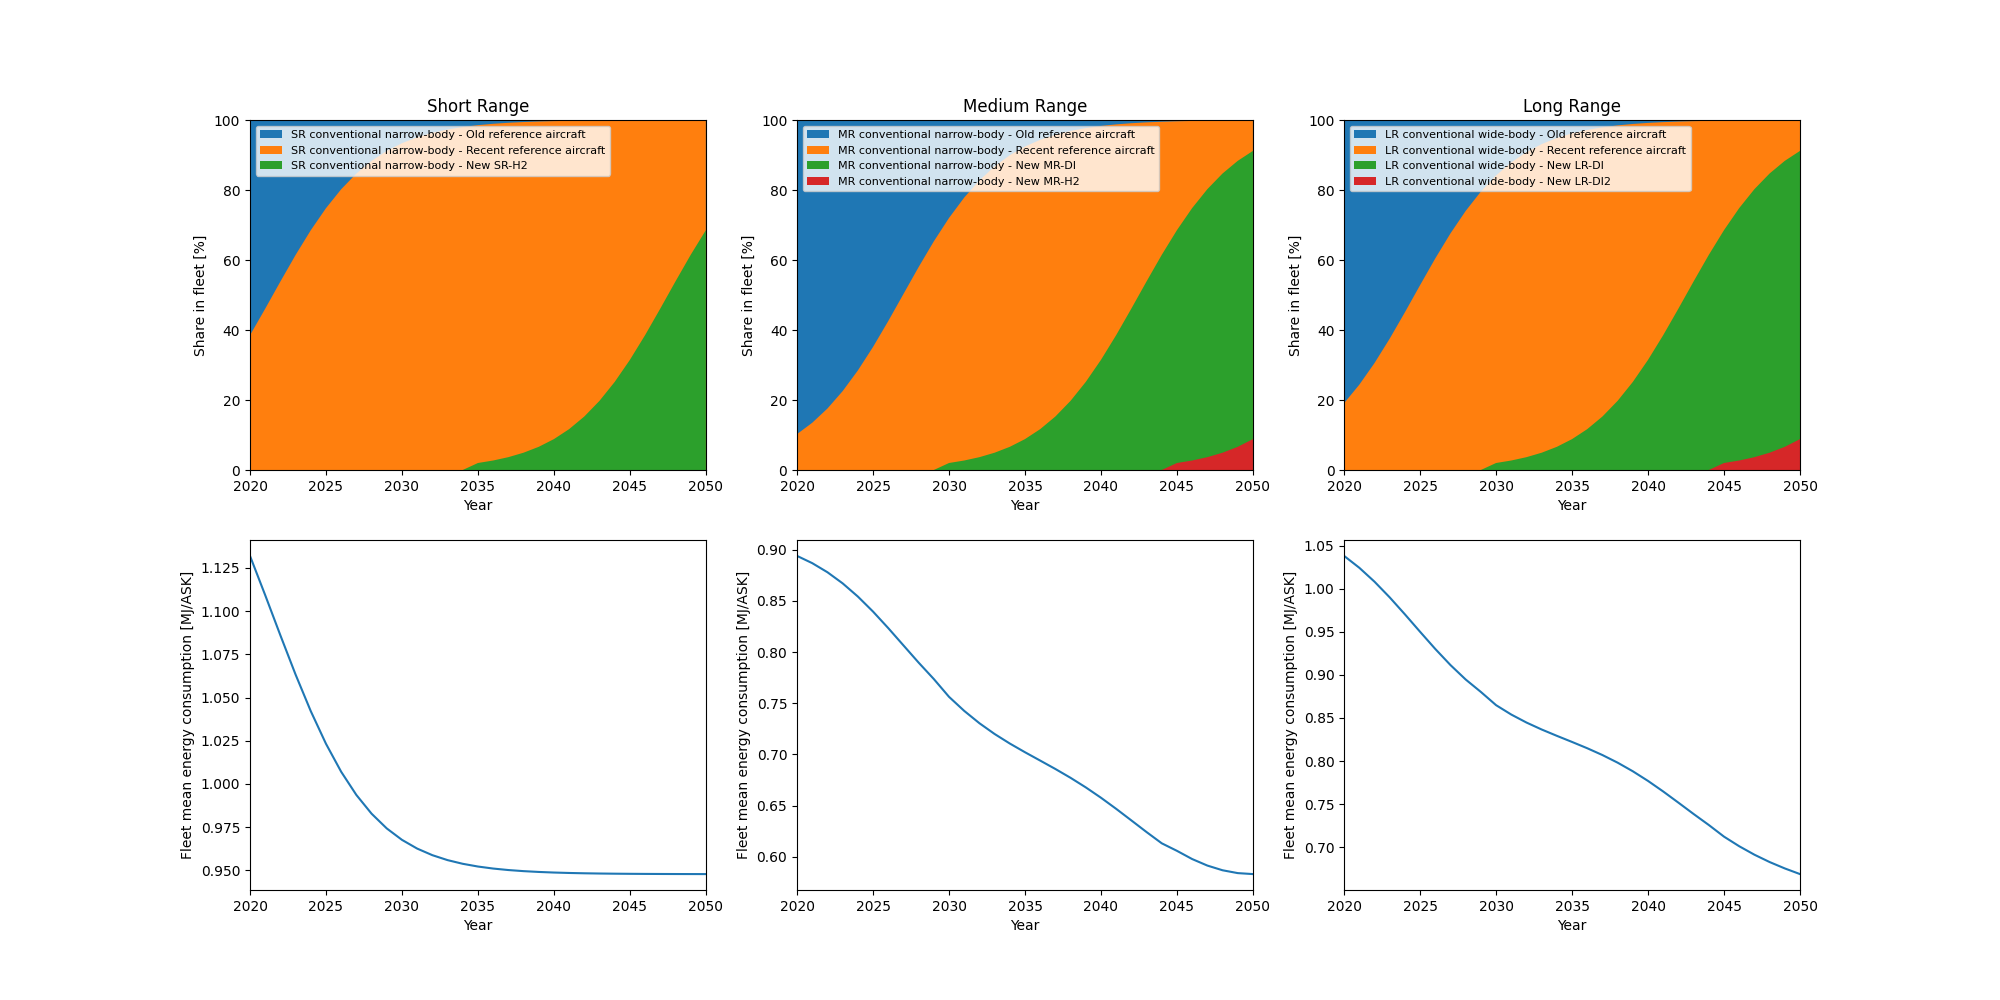

In [5]:
process.fleet.pretty_print()
process.fleet_model.compute()
process.fleet_model.plot()

### 1-c) Operational improvements

Operational improvements are considered via two opportunities. 
- Load factor improvement: improvement to 89% at the end of the scenario.
- Operational efficiency (better ATM, aircrfat MRO and operational optimisation): improvement of 8% in 25 years. 

Cost savings incur through the fuel savings. However, it could come at an extra cost (non-energy). This parameter is modelled, but not considered in this article due to lack of specific informations to the best of our knowldege.


In [ ]:
process.parameters.load_factor_end_year = 89.0  # 2019 value: 82.399312

In [ ]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

## 1-d) Energy

***Pathway choices:***
An energy mix is defined, relatively arbitraily, but inspired from [ReFuel-EU](https://eur-lex.europa.eu/legal-content/EN/TXT/HTML/?uri=OJ:L_202302405#d1e35-29-1) blending mandates. Sythetic fuels are defined as fuels of non-biological origin, either hydrogen or e-fuels, produced with DAC.

| Year | SAF (%) | incl. Synthetic Fuels (%) |
|---|---|---|
| 2025 | 2 | 0 |
| 2030 | 6 | 1.2 |
| 2035 | 20 | 5 |
| 2040 | 34 | 10 |
| 2045 | 42 | 15 |
| 2050 | 70 | 35 |

It is easy to define blending shares for drop-in fuels. However, hydrogen consumption is more dependant on how many hydrogen aircraft are used.
We therefore consider that the Refuel-EU blending mandates are applied directly to the dropin fuels (more ambitious than refuel-EU).

Within biofuel pathways, shares are defined according to their biomass availability.

Hydrogen production starts from the current production [shares](https://iea.blob.core.windows.net/assets/c5bc75b1-9e4d-460d-9056-6e8e626a11c4/GlobalHydrogenReview2022.pdf) (p71) and follows the repartition of [NZE](https://www.iea.org/reports/hydrogen-2156) until 2050. Note that these are industry wide projections, and aviation might use larger (or smaller) share of electrolysis hydrogen.

| Year | Coal (%) | Coal + CCS (%) | Gas (%) | Gas+CCS (%) | Electrolysis (%) |
|---|---|---|---|---|---|
| 2022 | 25 | 0.25 | 75 | 0.75 | 0 |
| 2030 | 13.4 | 3 | 40 | 9  | 34.6 |
| 2035 | 7.6 | 3.9 | 22.6 | 11.9 | 54 |
| 2050 | 1 | 5 | 3 | 15 | 76 |


***Emission factors & availabilities:*** All emissions factors/energy availabilities are default AeroMAPS median emission factors (see documentation).


***Cost process.parameters:***

- **Biofuels:** All values for biofuels are derived from a litterature review (refer to resources/cost_data/Biomass_Data.xlsx); Values are set to the median value and no evolution (such as learning rates) is assumed. Municipal solid waste feedstock is considered as free by the sources reviewed, although it could be diffrent once there is a demand for it.

| Pathway | Capex (€/(kg/day)) | Opex (€/L) | Feedstock Cost (cts €/MJ biomass) |
|---|---|---|---|
| HEFA-FOG | 491 | 0.17 | 1.27 |
| HEFA-Others | 654 | 0.13 | 1.22 |
| FT-MSW | 3042 | 0.29 | 0 |
| FT-Others | 2043 | 0.27 | 0.7 |
| AtJ | 1547 | 0.21 | 1.02 |

- **Hydrogen - Electrolysis:** (refer to resources/cost_data/Hydrogen_based_process.xlsx). 
    - Values for OPEX base on a litterature review, mostly relying on an institutional report from the [UK department of Energy](https://www.gov.uk/government/publications/hydrogen-production-costs-2021). Time dynamics represented by a transition from pessimistic in 2020 to median in 2030 to optimistic in 2050 and beyond. 
    - Values  and time Dynamic for CAPEX and efficiency using data from an [external litterature review](https://h2.pik-potsdam.de/H2Dash/)
    - Both dedicated renewable and grid electricity are used in this work.

| Year | Capex (€/(kg $H_2$/day)) | Variable Opex (€/kg $H_2$) | Fixed Opex (€/(kg $H_2$/day)/year)  | Efficiency (%) |
|:---:|:---:|:---:|:---:|:---:|
| 2020 | 533 | 0.3 | 25 | 0.64 |
| 2030 | 355 | 0.19 | 21 | 0.66 |
| 2040 | 261 |  |  |  |
| 2050 | 210 | 0.12 | 20 | 0.72 |

- **Hydrogen - Other pathways:** Based on literature review (see supplementary material). Fixed cost references based on [IEA Global Hydrogen Review 2021](https://iea.blob.core.windows.net/assets/2ceb17b8-474f-4154-aab5-4d898f735c17/IEAGHRassumptions_final.pdf). CCS is assumed to cost 22.5€/t$CO_2$

| Pathway | Capex (€/(kg/day)) | Fixed Opex (€/(kg/day)/year)  | Efficiency (%) | 
|:---:|:---:|:---:|:---:|
| Gas reforming | 917 | 43.1 | 76 |
| Gas reforming + CCS | 1728 | 69.1 | 69 | 
| Coal gasification | 2304 | 115.2 | 60 | 
| Coal gasification + CCS | 2399 | 119.95 | 58 |



- **Hydrogen - Liquefaction and transport:**
    Hydrogen production and transportation is considered similarly for all the production pathways. Based on literature review (see supplementary material) presented in [hoelzen et al.](https://www.sciencedirect.com/science/article/pii/S0360319921043184). Prices swicth from pessimistic to median to optimistic values in 2020-2035-2050, as well as efficiencies, which are defined by the ratio of the hydrogen energy with this value plus the energy necessary to liquefy the hydrogen. Opex are taken as 4% of Capex annually. Transport is weakly modelled and assumed to represent 10% of the total hydrogen production cost.

| Year | Capex (€/(kg $H_2$/day)) | Efficiency (%) |
|---|---|---|
| 2020 | 2248 | 0.75 |
| 2030 | 1457 | 0.82 |
| 2050 | 899 | 0.83 |


- **Efuels:** Based on literature review (refer to resources/cost_data/Hydrogen_based_process.xlsx). Time dynamics represented by a transition from pessimistic in 2020 to median in 2035 to optimistic in 2050 and beyond. Both dedicated renewable and grid electricity are used in this work.
    - Values for CO2 DAC taken from a litterature review.  2020 and 2030 value based on the trajcetory taken by [Ueckerdt](https://www.nature.com/articles/s41558-021-01032-7), but 2050 value is capped at 100 USD for consistency with other sources reviewed. 

| Year | Capex (€/(kg $H_2$/day)) | Opex (€/L) | $H_2$-> PtL efficiency (%) | Specific $CO_2$ (kg/L) | CO2 DAC Cost (€/t) |
|---|---|---|---|---|---|
| 2020 | 2496 | 0.34 | 74 | 4.3 | 460 |
| 2030 | 1528 | 0.30 | 74 | 3.58 | 150 |
| 2050 | 510 | 0.20 | 74 | 2.55 | 90 |

**Hypotheses considered for energy inputs:**

- **Electricity:** Electricity is considered via two options. 
    - *Grid*: Grid electricity input is assumed to cost 70€ per MWh in 2019, as a coarse mean between [europe](https://ec.europa.eu/eurostat/databrowser/view/nrg_pc_205/default/table?lang=en) and [usa](https://www.statista.com/statistics/190680/us-industrial-consumer-price-estimates-for-retail-electricity-since-1970/). If considering grid electricity alows for high load factors, it requires the full consideration of backups and tranportation systems (infrastructure), meaning that considering per technology LCOE can be a major shortcomming. Grid electricity prices in 2050 are not widely available, but a value of 100€/Mwh seems to be adequate with respect to total system costs estimated by French network administrator [RTE](https://assets.rte-france.com/prod/2022-06/Futurs%20%C3%A9nerg%C3%A9tiques%202050%20_%20rapport%20complet.zip). Baseline emission factor for the grid is [450 g$CO_2$/KWh](https://ourworldindata.org/grapher/carbon-intensity-electricity?time=2019) and are arbitrarily set at 20 g$CO_2$/KWh in 2050, in line with total low-carbon system emissions of [RTE](https://assets.rte-france.com/prod/2022-06/). Intermediate points are set at 160g in 2030 and 40g in 2040.
    
    - *Dedicated renewables*: (refer to resources/cost_data/Hydrogen_based_process.xlsx)
        - Wind: 
        
| Year | LCOE (€/MWh) | EF (gCO2/kWh) | Load Factor (%) | 
|---|---|---|---|
| 2020 | 61 | 15 | 40 | 
| 2030 | 58 | 13.5 | 43 | 
| 2040 | 52 | 12.5 | N/A | 
| 2050 | 46 | 11.5 | 45 | 

        - PV:
        
| Year | LCOE (€/MWh) | EF (gCO2/kWh) | Load Factor (%) | 
|---|---|---|---|
| 2020 | 58 | 43 | 13 | 
| 2030 | 37 | 36 | 14 | 
| 2040 | 33 | 30 | N/A | 
| 2050 | 26 | 21 | 14 | 


- **Fossil fuels**
    - Fossil based hydrogen (gas/coal) prices from [IEA Global Hydrogen Review 2021](https://iea.blob.core.windows.net/assets/2ceb17b8-474f-4154-aab5-4d898f735c17/IEAGHRassumptions_final.pdf), default values of AeroMAPS.
    
    - **Kerosene**: median of 2015-2019 Weekly U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price (refer to resources/cost_data/Biomass_data.xlsx); default aeromaps value.

    


In [ ]:
# ALL THE VALUES ARE NOW DEFINED IN THE YAML CONF FILE. KEPT HERE FOR REFERENCE.

# Energy settings: production choices

# # Aircraft energy - Introduction of alternative drop-in fuels

# ## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
# process.parameters.biofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
# process.parameters.biofuel_share_reference_years_values = [0, 2, 4.8, 15, 24, 27, 35]
# process.parameters.electrofuel_share_reference_years = [2020, 2025, 2030, 2035, 2040, 2045, 2050]
# process.parameters.electrofuel_share_reference_years_values = [0, 0, 1.2, 5, 10, 15, 35]


# ## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
# process.parameters.biofuel_hefa_fog_share_reference_years = []
# process.parameters.biofuel_hefa_fog_share_reference_years_values = [0.6]
# process.parameters.biofuel_hefa_others_share_reference_years = []
# process.parameters.biofuel_hefa_others_share_reference_years_values = [12.5]
# process.parameters.biofuel_ft_others_share_reference_years = []
# process.parameters.biofuel_ft_others_share_reference_years_values = [68.9]
# process.parameters.biofuel_ft_msw_share_reference_years = []
# process.parameters.biofuel_ft_msw_share_reference_years_values = [6.6]


# ## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
# ## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
# process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2035, 2050]
# process.parameters.hydrogen_electrolysis_share_reference_years_values = [0, 34.6, 54, 76]

# process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2035, 2050]
# process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0.75, 9, 11.9, 15]

# process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2035, 2050]
# process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0.25, 3, 3.9, 5]

# process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2035, 2050]
# process.parameters.hydrogen_gas_share_reference_years_values = [75, 40, 22.6, 3]

In [ ]:
# ALL THE VALUES ARE NOW DEFINED IN THE YAML CONF FILE. KEPT HERE FOR REFERENCE.

# Energy settings: cost

# BIOFUELS
# ==> Default AeroMAPS values (see table above)

# HYDROGEN

# ## Electrolysis
# ### Efficicency
# process.parameters.electrolysis_efficiency_reference_years = [2020, 2030, 2050]
# process.parameters.electrolysis_efficiency_reference_years_values = [0.64, 0.66, 0.72]
# ### CAPEX
# process.parameters.electrolyser_capex_reference_years = [2020, 2030, 2040, 2050]
# process.parameters.electrolyser_capex_reference_years_values = [533, 355, 261, 210]
# ### Fixed OPEX
# process.parameters.electrolyser_fixed_opex_reference_years = [2020, 2030, 2050]
# process.parameters.electrolyser_fixed_opex_reference_years_values = [25.05, 20.57, 19.62]
# ### Variable OPEX
# process.parameters.electrolyser_variable_opex_reference_years = [2020, 2030, 2050]
# process.parameters.electrolyser_variable_opex_reference_years_values = [0.3, 0.19, 0.12]

# ## Fossil (Gas or Coal with or without CCS)
# # ==> Default AeroMAPS values (see table above)

# ## Liquefaction
# ### CAPEX
# process.parameters.liquefier_capex_reference_years = [2020, 2030, 2050]
# process.parameters.liquefier_capex_reference_years_values = [2248, 1457, 899]
# ### Efficicency
# process.parameters.liquefaction_efficiency_reference_years = [2020, 2030, 2050]
# process.parameters.liquefaction_efficiency_reference_years_values = [0.75, 0.82, 0.83]


# # ELECTROFUEL
# ### Efficicency
# process.parameters.electrofuel_hydrogen_efficiency_reference_years = [2020, 2030, 2050]
# process.parameters.electrofuel_hydrogen_efficiency_reference_years_values = [0.74, 0.74, 0.74]
# ### CAPEX
# process.parameters.electrofuel_capex_reference_years = [2020, 2030, 2050]
# process.parameters.electrofuel_capex_reference_years_values = [2496, 1528, 510]

# process.parameters.electrofuel_var_opex_reference_years = [2020, 2030, 2050]
# process.parameters.electrofuel_var_opex_reference_years_values = [0.336, 0.296, 0.2]

# process.parameters.electrofuel_specific_co2_reference_years = [2020, 2030, 2050]
# process.parameters.electrofuel_specific_co2_reference_years_values = [4.30, 3.58, 2.552]

# process.parameters.co2_cost_reference_years = [2020, 2030, 2050]
# process.parameters.co2_cost_reference_years_values = [0.460, 0.150, 0.09]


# # ENERGY INPUT PRICES
# ## Grid Electricity
# # => LF=1

# process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
# process.parameters.electricity_emission_factor_reference_years_values = [429, 160, 40, 20]

# process.parameters.electricity_cost_reference_years = [2020, 2050]
# process.parameters.electricity_cost_reference_years_values = [0.08, 0.1]


# Kerosene, Coal, Gas => Default values (see table)

## 1-e) Other process.parameters 

In [ ]:
# Cost process.parameters

## Carbon tax => Set at zero for MACC curves
process.parameters.carbon_tax_reference_years = [2020, 2030, 2040, 2050]
process.parameters.carbon_tax_reference_years_values = [
    0,
    0,
    0,
    0,
]

# SDR

# #Quinet SCC
process.parameters.social_discount_rate = 0.045
process.parameters.exogenous_carbon_price_reference_years = [2020, 2030, 2040, 2050]
process.parameters.exogenous_carbon_price_reference_years_values = [54, 250, 500, 775]

# Barrage+Nordhaus SCC

# process.parameters.social_discount_rate = .043
# process.parameters.exogenous_carbon_price_reference_years = [2020, 2025, 2050]
# process.parameters.exogenous_carbon_price_reference_years_values = [43.3, 51, 108]

In [ ]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 285.0

In [ ]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
# process.parameters.aviation_biomass_allocated_share = 5.0
# process.parameters.aviation_electricity_allocated_share = 5.0

# 2- Compute

Run AeroMAPS process

In [ ]:
process.compute()
process.write_json()

# 3- Analyses

## 3-a) Scenario sustainability 

Lets begin by exploring the sustainability of the scenario:
- $CO_2$ emissions trajectory
- Fuels emission factors
- Ressources consumption

In [ ]:
process.plot("air_transport_co2_emissions")

In [ ]:
plt.rc("hatch", linewidth=1)

The first graph represents the annual CO₂ emissions of air transport as well as the relative contribution of the mitigation levers used.
There is no 'demand management' lever here, as the default growth rate of 3% p.a. was kept. As a reminder, this is 0.6/0.8% below Airbus and Boeing forecasts. The effect of cost increases on demand is not modelled.
Aircraft efficiency plays a large role in decarbonisation, but it is reminded that this lever is considered first: considering operational efficiency first would reduce the gap in their relative contribution.
Fossil kerosene substitution is efficient in this scenario: the emission factors associated with the various pathways are lower than the kerosene emission factor when they are used, as described by the following plot.

In [ ]:
process.plot("emission_factor_per_fuel")

ndeed, considering grid electricity makes electrofuels not climate-efficient compared to fossil kerosene before 2030 with the settings considered. The drop-in fuels blending mandate sIpecified uses only 1.2% electrofuel in 2030, meaning it has a marginal impact on the drop-in mean emission factor. This small inefficiency in the period 2025–2030 could be necessary for a faster ramp-up of production.  
Similarly, hydrogen is efficient only after 2032 because its production is dominated by unabated fossil pathways. However, no hydrogen aircraft is introduced until 2035.

In [ ]:
process.plot("multidisciplinary_assessment")

This plot embodies a sectoral budget concept of AeroMAPS: CO₂ budgets are defined by bodies such as the IPCC to respect a given temperature target. In this scenario, it was defined at 850 GT (+1.8°C global warming with a 63% chance).  
Similarly, a global budget can be defined in terms of equivalent carbon budgets (accounting for non-CO₂ effects), biomass available for bioenergy, and electricity (although the notion of resource is less direct in this case).  
The budgets are then scaled down to the sectoral level using allocation rules. In this case, the CO₂ budget is allocated using a grandfathering approach, giving aviation a share similar to its annual contribution to total emissions (2.6%). A similar approach is used for the total warming budget. Biomass and electricity budgets are arbitrarily set at 5%.  
The scenario respects the energy budgets but slightly exceeds the CO₂ budget (3.4% vs 2.6%) and largely exceeds the total warming budget. Non-CO₂ mitigation measures are neither activated nor investigated in this work, as they are not the main focus. However, they are crucial for mitigating aviation-related warming. Some CO₂ mitigation measures also impact non-CO₂ effects, either positively or negatively.

The budget itself is not a definitive metric: aviation could be allocated a larger budget than its historical contribution, but this would require other sectors to decarbonise faster to meet the global temperature target.

## 3-b) Costs

Then two costs metrics are presented here:
- Energy Cost 
- Aircraft DOC

In [ ]:
process.plot("mfsp_detailled")

This dynamic plot evaluates the minimal fuel selling price (selling price that ensure a null NPV of production plant) of all the pathways considered in AeroMAPS. A common unit €/MJ is sued to compare drop-in and non-drop in fuels on a same graph (*caution: eventual energy efficiency modification of non-dropin fuels is not taken into account here*).  
Kerosene is taken a reference at 0.41 €/L.

 * The cost of each biofuel pathways is fixed during the scenario and between 2 and 4 times the price of fossil fuel. 

 * Hydrogen and e-fuel prices evolves with time. 
    E-fuel is 7 times more expensive than kerosene in 2040 and 6.3 more expensive in 2050. Two remaks: the MFSP is a mean MFSP, inherent to a secnario: a plant with 2040 technology is still 
    delevering fuel in 2050 meaning the MFSP of 2050 is higher than best-technology MFSP in 2050.

 * Price of E-fuel is highly dominated by expenses in electricity procurement. Grid electricity, around 100€/Mwh is considered here. Some of the litterature uses dedicated renewables, cheaper but with a lower load factor. This is discussed later. As seen below, electrofuel MFSp evolution benefits from a decreasing CAPEX/OPEX hypothesis, despite the increase (80->100€/MWh) for electricity prices.   

 * The same remarks apply for hydrogen produced via water electrolysis, for wich lower capex doesn't balance electricity price increase. Fossil based hydrogen is priced around 2 to 3 time the kerosene cost, and carbon capture increses the MFSP by 21% (SMR) and 13% (CG). 



In [ ]:
process.plot("energy_mfsp")

In [ ]:
process.plot("energy_expenses")

The impact of increased energy prices combined to the higher energy prices results in an incread total energy expenses chronology, as illustrated above.

The energy efficiecy alows for significant saving compared to a frozen 2019 technology scenario. However, using alternative fuels cancels these saving by 2032 due o teh significant ramp up to alternative fuels in the specified blending mandate. Two segments can be observed. 
Between 2030 and 2042, and between 2042 and 2050. This correspond to the significant ramp up of moderately expensive biofuels first, and to the one of the e-fuels for the second segement.


This increase in energy expenses (they double, per ASK) might seem important. Although fuel is the [largest expense item](https://www.iata.org/en/iata-repository/publications/economic-reports/covid-19-cash-burn-analysis/) of airlines, both efficiency improvements and dillution by other costs (assumed to remain constant), limits the DOC inrease by 40% and the airfare increase by 25%. (see the plot below).

In [ ]:
process.plot("airfare_breakdown")

## 3-c) Marginal Abatement Cost Curves

This part of the notebook is dedicated to the central part of the article. Indeed, MACC curves, for which the methodology was presented in the paper are obtained here and commented.

In [ ]:
process.plot("annual_MACC")

This first MACC curve can be seen a different points in time using the interactive widget (slider).  
The selection widget can be used to select the three different carbon abatement cost metrics defined in the paper. 

<u>Preliminary remark</u>:  
Two zones can be identified:
- *positive abatements* (blue background). These measures actually reduce air transport $CO_2$ emission compared to the reference considered. Negative abatements costs are linked to cost savings (on the perimeter considered), and positive abatement costs to extra costs. 
- *negative abatements* (red background) are extra emissions compared to the reference considered. For instance, for aircraft efficiency levers, the reference is the average energy intensity of 2019. Therefore, aircraft that uses more energy than the average (old reference aircraft) are in the red zone. as carbon abatement costs are defined considereing emission reduction as positive and cost reduction as negative, Therefore, this red zone is counter intuitive: negative abatement cost are options that are both more expensive to operate and more emissive than the reference. Besides, GSCAC and SCAC are computed through the whole life of the plant, meaning they could have overall negative emissions, while it is not yet the case in the scenario; then , they are in the red zone, whith positive abatement cost, and should be treated equally as other blue zone options. Overall, comparing options in this zone is not recommended. 

### 3-c.1/ Instantaneous carbon abatement cost (*ICAC*)

Please refer to the Supplementary Material - Part I for the in depth definition of the instantaneous carbon abatement cost.  
To summarize, it is an easy to compute carbon abatement cost to compare, at a given point in time, the relative efficiency of different abatement options. However, it should not be used to decide when a project should be launched based on the comparison to a reference carbon value or to chose a project over another (or at least this value must be constant to do so).

A few comments on several points in time: 
- 2020 is heavyliy impacted by covid, which degrades both load factor and aircraft efficiency (empty flights?). This particular case is not what the curves are meant for. 
- In 2025 most of the abatement comes from efficiency abatement options, which, in this case are also less expensive. Although energy options are much more expensive, they are marginally utilized at this point in the blending mandate that was defined above.
- For 2030; comments are similar, exception being e-fuel, whith a massive negative CAC/neative abatement. As seens in part 3-a) of the notebook, this is linked to the evolution of the electricity emission factor, which results in electrofuel evolving progressively from a worse to a better fuel than kerosene. Since emissio factors are at the denominator of the carbon abatement cost, it creates a vertical asymptote when emission factors are equal. The effect can be seen in the following years, with electrofuel switching to the blue zone, and with a rapidly decreasing CAC, despite a moderately decreasing MFSP. The metric is thus not particularly relevant to compare options whith very similar emissions factors. 
- 2035 is characterized by the EIS of the first hydrogen aircraft in the scenario. The effect of the aircraft itself can be seen in the blue zone: with the parameters set, the aicrfat uses less energy than the 2019 average. However, the extra non-fuel doc specified (+10%) results in a positive CAC. The hydrogen is considered to be produced as sepecified in the settings: unabated fossil-based hydrogen is in the red zone. Their carbon-capture counterparts are relatively cost efficient when compared to biofuels, and to electrolysis hydrogen.
- No other major changes occur until teh end of the scenario; however, e-fuel and electrolysis-hydrogen become more cost competitive. 


### 3-c.2/ Specific carbon abatement cost (*SCAC*)

The comments drawn before are still valid. However, the specific abatement cost is much more relevant to evaluate projects, by evalauting their economic relevance at their launch date. Refer to the article for a discussion on this specific point. Since the costs of the projects are discounted throughout their lifespan, and that the evalution takes into account the future evolution of prices and emissions, the SCAC is lower than the ICAC at the same date.  
They can be compared to a carbon value that grows with the discout rate (see next section).

### 3-c.3/ Generic - Specific carbon abatement cost (*G-SCAC*)

This is a variant of the previous metric, made to be compared to a generic carbon value.


## 3-d) Scenerio Marginal Abatement Cost Curves

Like in 3-c), the plot below can be tuned for each metric using the widget. 

This curve is similar to the previous annual curve, but concatenates the various years in a single graph; Abatements costs are reprented using a colorscale, while each year is a different bar on the x-axis. The y-axis represents the abatement volume. 

- for the instantenous carbon abatement cost, the observations are similar than in the previous section.
- for the specific carbon abatement cost, however, it is possible to visualize on a single graph, which measures are economically interesting considering a hotelling carbon value, and when they become attractive, making their usage desirable. Another widget alows, in this case, to chose a starting value for the carbon price. The dotted zone represents measures whose specific abatement cost is higher than the reference value at this point in time. As a reminer, the interest in this case is that the abatement cost is independant from the carbon price trajectory.

- the generic abatement cost allows for a reference carbon price that is not growing with the discount rate. It is indeed the case with approaches in which other factors ake taken ito account to justify a time-evolving value of a given ton of carbon, which is the case with most trajectories found in the litterature. 

In [ ]:
process.plot("scenario_MACC")

As a purpose of illustration, cost-efficiency set values from a litterature review of IPCC, reported in [this article](https://www.insee.fr/en/statistiques/4253150?sommaire=4253180) are used.

Two 2050 carbon prices are used as end-point hotteling growth rate trajectories
- for a carbon budget corresponding to between 50 and 67% chance of exceeding 1.5°C; 518 €2020 in 2050, wich translates into a 120 €2020 reference starting point in 2020 with a 5% discount rate
    - No positive abatement cost option is socially interesting before 2030. After which biofuel pathways below 300€ CAC are used as well. Hydrogen produced via electrolysis is below SCC after 2043 and e-fuel after 2047. refer to the article for more discussions.
- for a carbon budget corresponding to between 34 and 50% chance of exceeding 2°C;149 €2020 in 2050, wich translates into a 35 €2020 reference starting point in 2020 with a 5% discount rate
    - No positive abatement cost measure is socially interesting in this scenario until 2037. Besides, it reveals one very important aspect of this curve: between 2035 and 2050, hydrogen aircraft are considered interesting, because they provide energy savings. However, none of hydrogen production pathways are interesting before 2048 (Gas CCS). In this case, computing a composite carbon abatement cost of those two options, to determine when the aircraft system should start being used, seems a relevant recommandation. 

Considering either a 1.5 or a 2 degree (economy-wide) target seems to have large implications for aviation, as is is a tipping point between a "business as usual" (whit larger push for efficiency), and a larger decarbonising scenario in which alernative energies are used. Indded, only 53% of the planned decarbonisation is achieved in 2050 instead of 100% (NB: these values are share of *scenario* decarbonisation: even at 100%, emissions are still way above zero, as metionned in the emissions graph earlier.


Then, as most papers do consider more complex models for constructing their reference value trajectories for carbon, two generic trajectories are tested:
-  [Quinet 2019](https://www.insee.fr/en/statistiques/4253150?sommaire=4253180), implementing french value for climate action. The options activated are relatively similar to the trajectory defined for the 1.5 degrees target. However, they are activated much ssoner. The discount rate used is 4.5%
- [Barrage/Nordhaus 2023](https://doi.org/10.1073/pnas.2312030121), implementing their central carbon price trajectory (4.3% discout rate). The options activated are similar to those of the 2 degrees target, but the hydrogen aircraft is not interesting at any point. 
    
Scenarios are redisgned to fit these trajectories in section 4.

The same work can be done 

In [ ]:
process.plot("shadow_carbon_pricing")

## 3-e) Scenerio Marginal Abatement Cost Curves

Finally, it is possible to adopt the formalism of the annual MAC Curve but for the whole scenario. See the article for comments on this plot.


In [ ]:
process.plot("cumulative_MACC")

# 4) Designing a new scenario

This last section consits in redefining a few scenarios. 

## 4-a) Low carbon price scenario

First, we consider the lowest of the two exogenous carbon value trajectories. As it can be seen with the scenario MACC, no positive abatement cots option is activated. (Hydrogen aircraft is, but not its enrgy)
The relative parameters are modified directly in the input file of the scenario. Hydrogen aircraft are replaced by two more efficient drop-in counterparts. 

In [6]:
alternate_low_process = create_process(
    configuration_file="./data/alternate_low/config_alternate_low_scenario.json",
    models=copy.deepcopy(models),
)

⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.


Short Range (life=25y, limit=2, subcategories=1, share_sum=100.0%)
  - SR conventional narrow-body (share=100.0%, aircraft=1)
    - old reference (EIS=1970 y, energy/ASK=1.2472568306010927 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2009.0045994444736 y, energy/ASK=0.9478251366120218 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - New SR-H2 (DROP_IN_FUEL, EIS=2035y, cons=-20%, NOx=-75%, soot=-100%, DOC=0%)
Medium Range (life=25y, limit=2, subcategories=1, share_sum=100.0%)
  - MR conventional narrow-body (share=100.0%, aircraft=2)
    - old reference (EIS=1970 y, energy/ASK=0.9163060109289617 MJ/ASK, DOC=0.0301 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2014.4654504665843 y, energy/ASK=0.6979234972677595 MJ/ASK, DOC=0.0301 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - New MR-DI (DROP_IN_FUEL, EIS=2030y, cons=-20%, NOx=0%, soot=0%, DOC=0%)
    - New MR-H2 (DROP_IN_FUEL, EIS=2

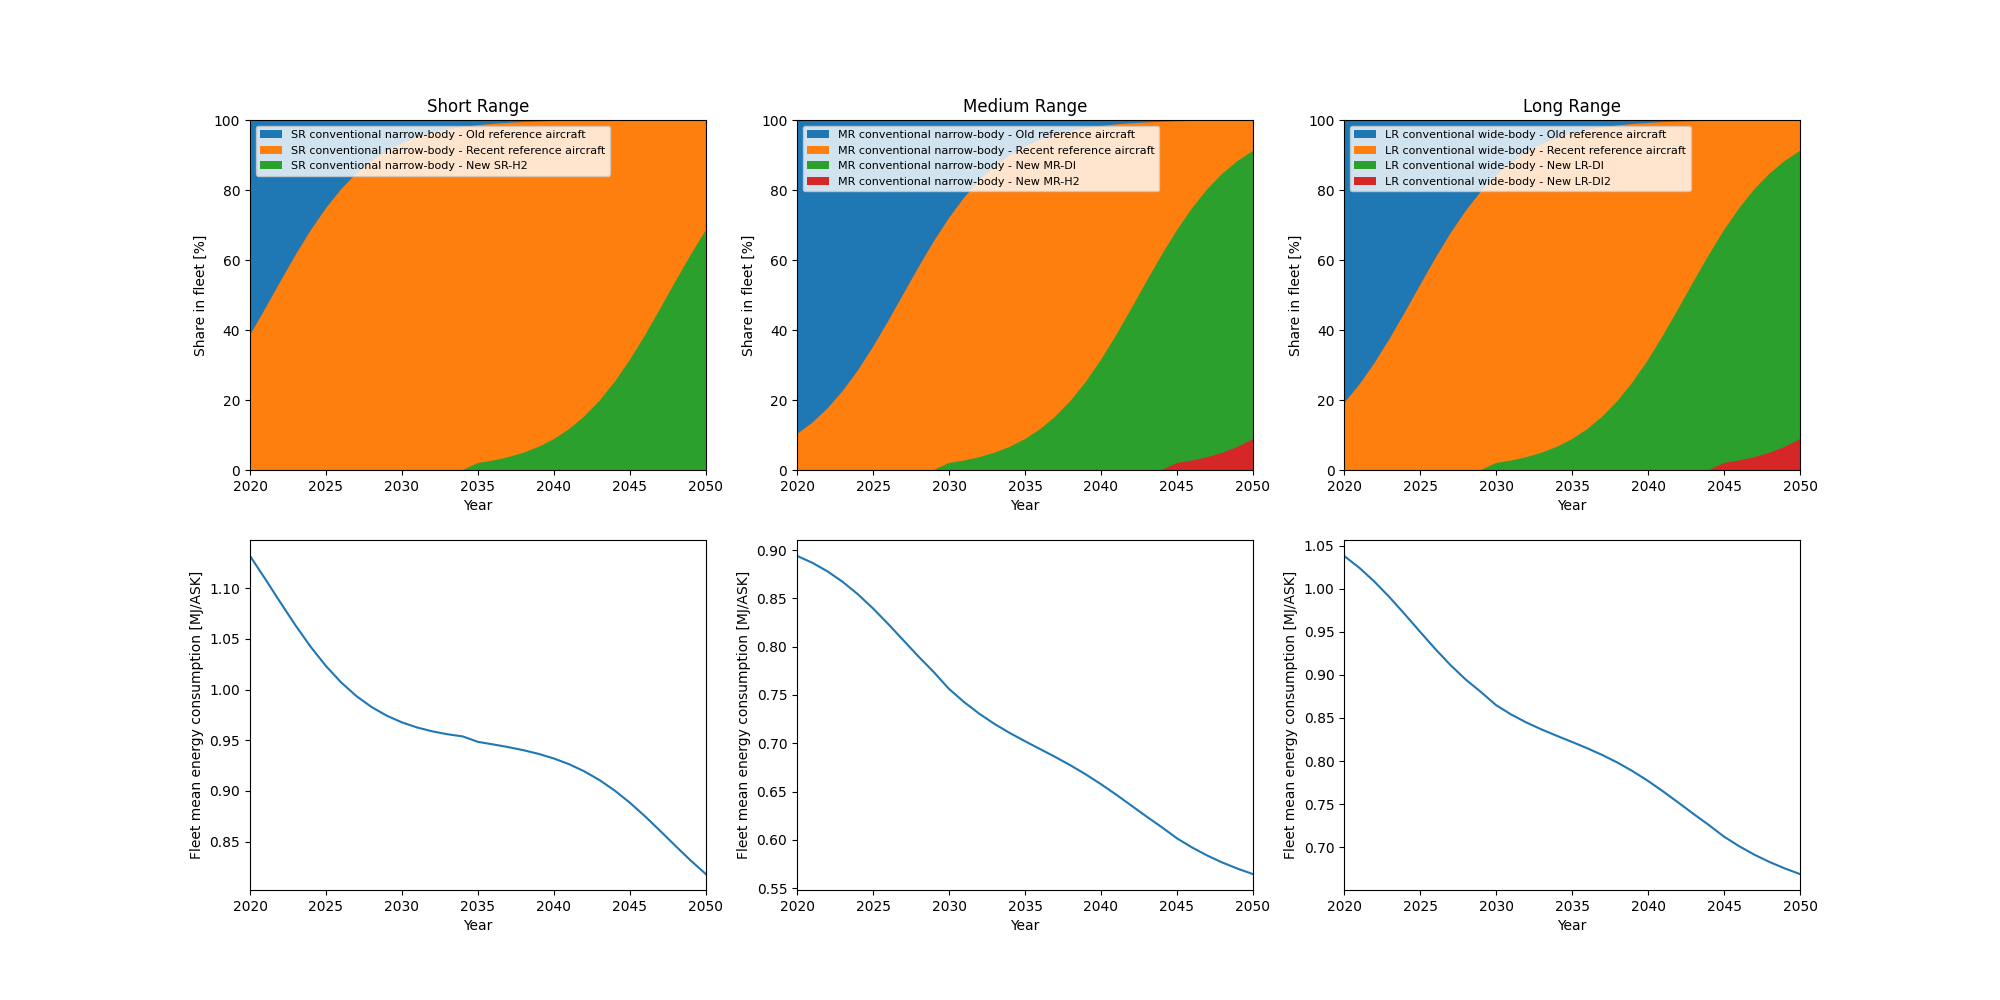

In [7]:
# Aircraft fleet
# Same fleet as central scenario, but no H2 aircraft, considering more efficient drop in aircraft instead.

alternate_low_process.fleet.pretty_print()
alternate_low_process.fleet_model.compute()
alternate_low_process.fleet_model.plot()

In [ ]:
alternate_low_process.compute()
alternate_low_process.write_json()

In [ ]:
alternate_low_process.plot("scenario_MACC")

In [ ]:
alternate_low_process.plot("shadow_carbon_pricing")

In [ ]:
alternate_low_process.plot(
    "multidisciplinary_assessment", save=True, size_inches=(4, 4), remove_title=True
)

In [ ]:
alternate_low_process.plot("airfare_breakdown")

## 4-b) High carbon price scenario

Dropin shares: all biofuel before 2040, ReFuelEU for 2045 and 2050

For biofuels:
 - HEFA - FOG => 100% 2020-2023 => Caped at 2023 value then.
 - other pathways split the remainging share based on their avalabilities. 
 
Hydrogen blend unchanged. 

All parameters are modified directly in the input file of the scenario. 

In [ ]:
alternate_high_process = create_process(
    configuration_file="./data/alternate_high/config_alternate_high_scenario.json",
    models=copy.deepcopy(models),
)

In [ ]:
# # Aircraft fleet ==> Similar Process as for base scenario, but the code cannot yet use the same fleet directly, need to redefine each aircraft

alternate_high_process.fleet.pretty_print()
alternate_high_process.fleet_model.compute()
alternate_high_process.fleet_model.plot()

In [ ]:
alternate_high_process.compute()
alternate_high_process.write_json()

In [ ]:
alternate_high_process.plot("scenario_MACC")

In [ ]:
alternate_high_process.plot("shadow_carbon_pricing")

In [ ]:
alternate_high_process.plot("multidisciplinary_assessment")

In [ ]:
alternate_high_process.plot("airfare_breakdown")

## 4-c) Dedicated renewables and discount rate: sensitivity analysis 

Carbon abatement costs combine uncertainties of various nature on costs (technological, financial...) but also on emission factors. Abatement potentials also introduce uncertainties on each option's availability. MACC are therefore prone to uncertainty propagation. Links between those uncertainties are also potentially meaningful. This is not in the scope of this paper, but this section paves the way in that direction by performing a sensitivity analysis on the abatement costs of electrofuels. The observations and remarks are, however, applicable to all other abatement costs. 

As can illsutrated on the detailled MFSP figure above in this scenario, a very large proportion of the MFSP for electrofuel and hydrogen produced by electrolysis is associated with electricity. Therefore, it seems appropriate to carry out a sensitivity analysis on this parameter, given that the assumptions considered here are conservative, assuming a slight increase in grid electricity prices. Indeed, sources using dedicated renewable electricity, such as [Ueckerdt et al.](10.1038/s41558-021-01032-7), report significantly lower production costs. 

However, the use of dedicated renewables is subject to an additionality requirement in Europe ([European Commission Directive](http://data.europa.eu/eli/reg_del/2023/1184/oj/eng)). Indeed, renewables are needed to decarbonise most electricity grids, but also to increase their capacity for direct electrification and hydrogen production. As long as grids are not decarbonised, using the electricity to produce hydrogen or electrofuels could be worse than using it elsewhere, depending on the characteristics of each use case. For instance, a given amount of electricity used in electric cars replaces more final energy than if used to produce electrofuels due to the higher overall efficiency ([Ueckerdt et al.](10.1038/s41558-021-01032-7)). These issues are not considered in this paper. 


To test the effect of dedicated renewables on e-fuel prices, a sensitivity analysis is conducted below, considering different financial conditions. 

Three scenarios are defined, a reference, identical to the illustrative scenario of the artcile is defined, as well as one considering only solar and one only wind power. 

***Detailled comments are provided after the figure, at the end of the notebook***


**Code explanation**
For compactness of notebook structure, the folowing celles should be ran several time to have the necessary data for the sensitivity analysis the following figure, changing each time sensitivity parameters:

- Electricity sources
- Private interest rate (affecting the MFSP)
- Social discount rate (affecting the specific abatement cost)


In [ ]:
# Effect of private/public SDR

private_discount_rate = 0.1
social_discount_rate = 0.045

# private_discount_rate = 0.045
# social_discount_rate = 0.00
# social_discount_rate = 0.1

⚠️ Warning: reference pathway for CAC (fossil_kerosene is not defined as bottom-up, using top-down values for CAC computation.
Short Range (life=25y, limit=2, subcategories=1, share_sum=100.0%)
  - SR conventional narrow-body (share=100.0%, aircraft=1)
    - old reference (EIS=1970 y, energy/ASK=1.2472568306010927 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2009.0045994444736 y, energy/ASK=0.9478251366120218 MJ/ASK, DOC=0.048375 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - New SR-H2 (HYDROGEN, EIS=2035y, cons=0%, NOx=-75%, soot=-100%, DOC=10%)
Medium Range (life=25y, limit=2, subcategories=1, share_sum=100.0%)
  - MR conventional narrow-body (share=100.0%, aircraft=2)
    - old reference (EIS=1970 y, energy/ASK=0.9163060109289617 MJ/ASK, DOC=0.0301 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 kg/ASK)
    - recent reference (EIS=2014.4654504665843 y, energy/ASK=0.6979234972677595 MJ/ASK, DOC=0.0301 €/ASK, NOx=0.01514 kg/ASK, soot=3e-05 

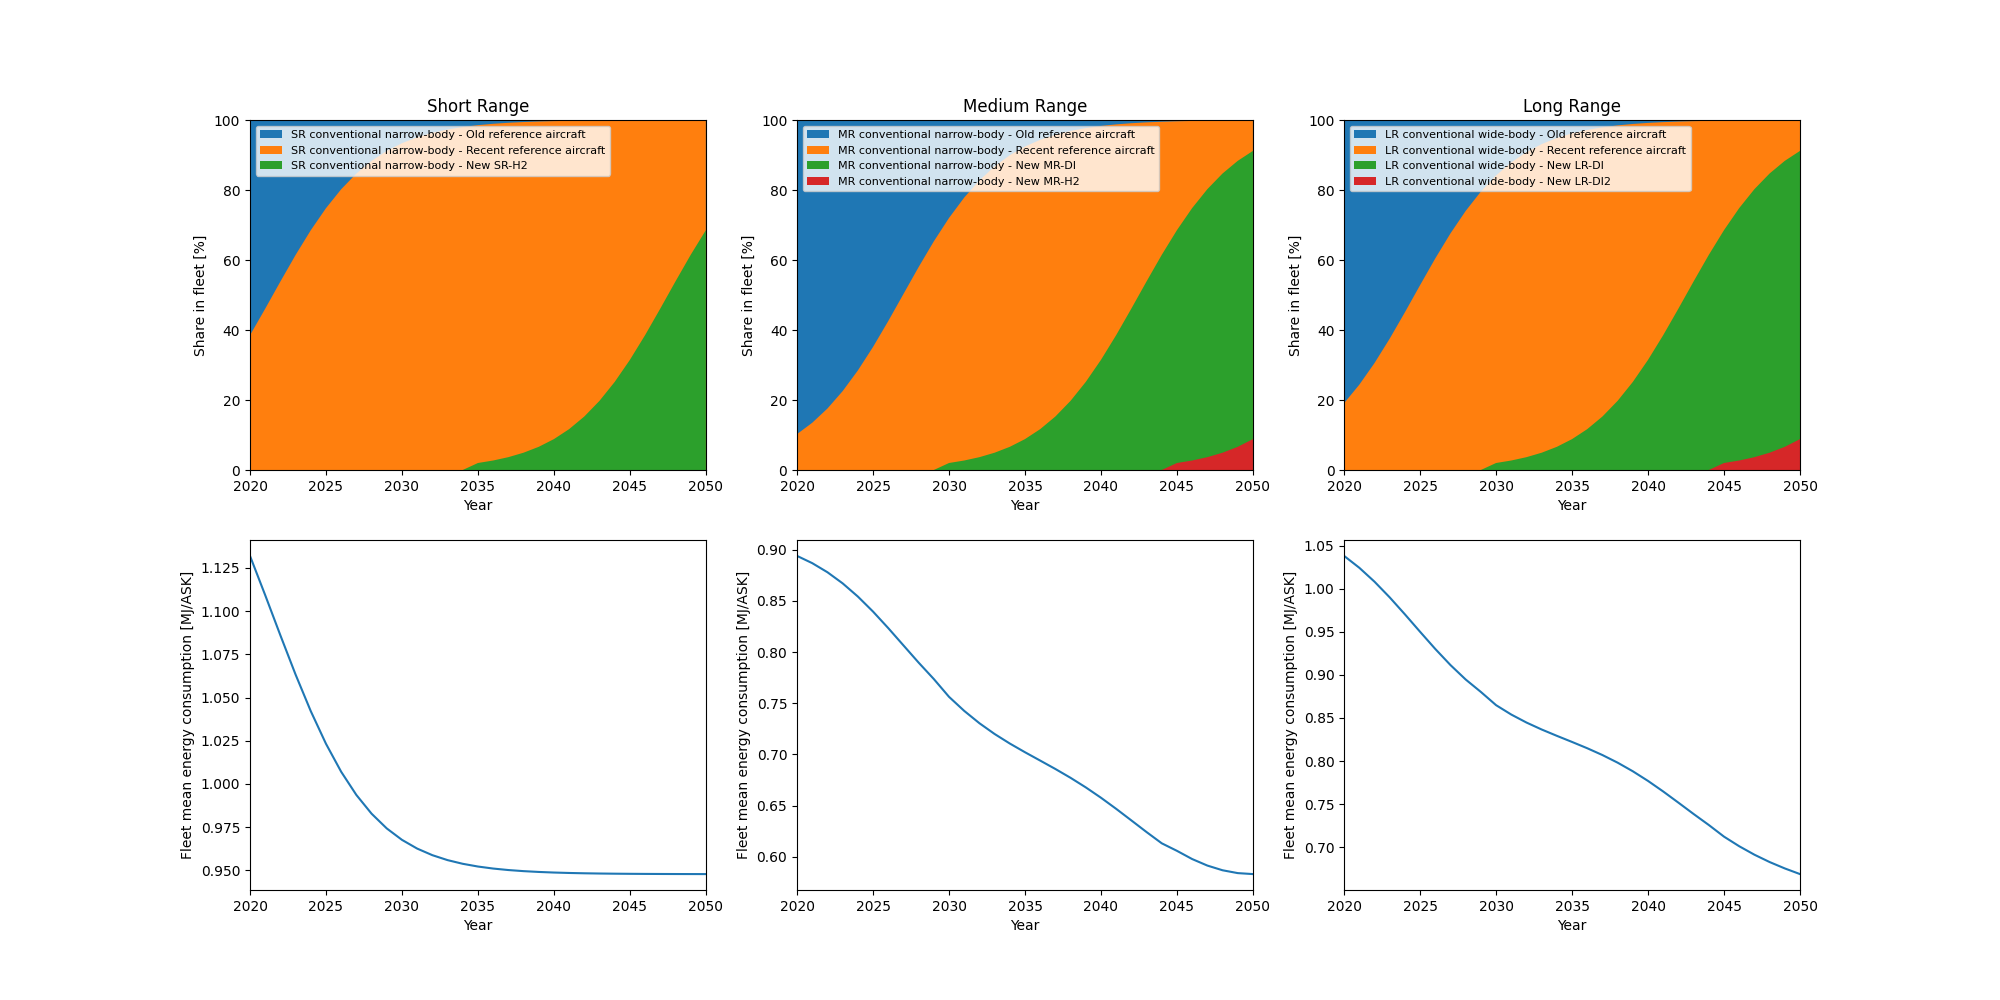

In [9]:
# Define a reference cas, similar to central scenario

alternate_ded_ref_process = create_process(
    configuration_file="data/dedicated_renewables/config_dedi_ren_scenario.json",
    models=copy.deepcopy(models),
)


# Define fleet

# # Aircraft fleet ==> Similar Process as for base scenario, but the code cannot yet use the same fleet directly, need to redefine each aircraft

alternate_ded_ref_process.fleet.pretty_print()
alternate_ded_ref_process.fleet_model.compute()
alternate_ded_ref_process.fleet_model.plot()

In [ ]:
alternate_ded_ref_process.parameters.private_discount_rate = private_discount_rate
alternate_ded_ref_process.parameters.social_discount_rate = social_discount_rate

alternate_ded_ref_process.compute()
alternate_ded_ref_process.write_json()

In [ ]:
# Define a photovoltaic scenario, similar to reference but for electricity

alternate_ded_PV_process = create_process(
    configuration_file="data/dedicated_renewables/config_dedi_ren_pv.json",
    models=copy.deepcopy(models),
)

alternate_ded_PV_process.fleet.pretty_print()
alternate_ded_PV_process.fleet_model.compute()
alternate_ded_PV_process.fleet_model.plot()



In [ ]:
alternate_ded_PV_process.parameters.private_discount_rate = private_discount_rate
alternate_ded_PV_process.parameters.social_discount_rate = social_discount_rate


# PV
# alternate_ded_PV_process.parameters.electricity_emission_factor_reference_years = [
#     2020,
#     2030,
#     2040,
#     2050,
# ]
# alternate_ded_PV_process.parameters.electricity_emission_factor_reference_years_values = [
#     43,
#     36,
#     30,
#     21,
# ]

# alternate_ded_PV_process.parameters.electricity_cost_reference_years = [2020, 2030, 2040, 2050]
# alternate_ded_PV_process.parameters.electricity_cost_reference_years_values = [
#     0.058,
#     0.037,
#     0.033,
#     0.026,
# ]

# alternate_ded_PV_process.parameters.electricity_load_factor_reference_years = [2020, 2030, 2050]
# alternate_ded_PV_process.parameters.electricity_load_factor_reference_years_values = [
#     0.13,
#     0.14,
#     0.14,
# ]


alternate_ded_PV_process.compute()
alternate_ded_PV_process.write_json()

In [ ]:
# Define a wind scenario, similar to reference but for electricity

alternate_ded_W_process = create_process(
    configuration_file="data/dedicated_renewables/config_dedi_ren_wind.json",
    models=copy.deepcopy(models),
)

alternate_ded_W_process.fleet.pretty_print()
alternate_ded_W_process.fleet_model.compute()
alternate_ded_W_process.fleet_model.plot()




In [ ]:

alternate_ded_W_process.parameters.private_discount_rate = private_discount_rate
alternate_ded_W_process.parameters.social_discount_rate = social_discount_rate


# ## Wind
# alternate_ded_W_process.parameters.electricity_emission_factor_reference_years = [
#     2020,
#     2030,
#     2040,
#     2050,
# ]
# alternate_ded_W_process.parameters.electricity_emission_factor_reference_years_values = [
#     15,
#     13.5,
#     12.5,
#     11.5,
# ]

# alternate_ded_W_process.parameters.electricity_cost_reference_years = [2020, 2030, 2040, 2050]
# alternate_ded_W_process.parameters.electricity_cost_reference_years_values = [
#     0.061,
#     0.058,
#     0.052,
#     0.046,
# ]

# alternate_ded_W_process.parameters.electricity_load_factor_reference_years = [2020, 2030, 2050]
# alternate_ded_W_process.parameters.electricity_load_factor_reference_years_values = [
#     0.4,
#     0.43,
#     0.45,
# ]

alternate_ded_W_process.compute()
alternate_ded_W_process.write_json()

In [ ]:
# Storing the data : standard social discount of 4,5% and private interest of 10%

# data_W = alternate_ded_W_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_PV = alternate_ded_PV_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_ref = alternate_ded_ref_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]

# Storing the data : social discount of 0% and private interest of 10% (modify parameter in dedicated cell above before running processes again!)

# data_W_0 = alternate_ded_W_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_PV_0 = alternate_ded_PV_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_ref_0 = alternate_ded_ref_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]

# Storing the data : social discount of 10% and private interest of 10% (modify parameter in dedicated cell above before running processes again!)

# data_W_10 = alternate_ded_W_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_PV_10 = alternate_ded_PV_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_ref_10 = alternate_ded_ref_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]

# Storing the data : social discount of 4,5% and private interest of 4,5% (modify parameter in dedicated cell above before running processes again!)

# data_W_SDR = alternate_ded_W_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_PV_SDR = alternate_ded_PV_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]
# data_ref_SDR = alternate_ded_ref_process.vector_outputs_df["specific_carbon_abatement_cost_electrofuel"]

In [ ]:
# # The plot below is commented out to avoid crashing the notebbok. Iterative runs of the data above are required before plotting!

# plt.figure(figsize=(10, 6))

# plt.plot(data_ref, label="Grid", color="black")
# plt.plot(data_W, label="Dedicated Wind", color="royalblue")
# plt.plot(data_PV, label="Dedicated Solar", color="darkorange")

# plt.fill_between(data_ref_0.index, data_ref_0, data_ref_10, color="black", alpha=0.1)
# plt.fill_between(data_W_0.index, data_W_0, data_W_10, color="royalblue", alpha=0.1)
# plt.fill_between(data_PV_0.index, data_PV_0, data_PV_10, color="orange", alpha=0.2)

# plt.plot(data_ref_SDR, label="Grid - Low interest rate", ls="--", color="black")
# plt.plot(data_W_SDR, label="Dedicated Wind - Low interest rate", ls="--", color="royalblue")
# plt.plot(data_PV_SDR, label="Dedicated Solar - Low interest rate", ls="--", color="darkorange")


# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Specific Carbon Abatement Cost (€/t$\mathregular{CO_2}$", fontsize=12)
# plt.legend(fontsize=12)
# plt.grid(True)
# plt.tight_layout()

# plt.savefig("sensitivity_efuel.pdf")

## Detailled comment - sensitivity to prices and discounting.


Plain lines in the figure above illustrate the effect of considering dedicated renewable instead of grid electricity for electrofuel production. Assumptions taken for costs range from 61 €/MWh in 2020 to 46 €/MWh in 2050 for wind (58 to 26 for solar). The emission factor evolves from 15 to 11.5 gCO\textsubscript{2}/kWh for wind (43 to 21 for solar). Finally, the average load factor evolves from 40% to 45% for wind (13% to 14% for solar). These numbers are based on [RTE French Grid scenarios](https://assets.rte-france.com/prod/public/2022-01/Energy%20pathways%202050_Key%20results.pdf) and [IAE Net Zero](https://www.iea.org/reports/net-zero-roadmap-a-global-pathway-to-keep-the-15-0c-goal-in-reach). 

Using wind power drastically lowers the SCAC of electrofuels at any point in time. However, using photovoltaic power increases the abatement costs. Indeed, the savings from a lower emission factor and lower costs are outweighed by the very low load factor: to ensure the same output, one would need seven times more electrofuel production capacity compared to using grid electricity. Note that the potential hydrogen storage between the electrolysis and the hydrocarbon synthesis is not modelled for e-fuels; this could reduce this effect. With solar power, the mean MFSP in 2035 would be 4.8 €/L compared to 3.0 €/L in the reference case and 2.9 €/L with dedicated wind power. However, capital counts for 68.5% of the MFSP in the solar case, while electricity expenses represent 12%. This proportion is reversed to 16% and 56% respectively for the grid case. 

The cost of the capital considered seems to be a crucial parameter in the evaluation of the MFSP for e-fuels. By default, it is set arbitrarily at 10%. By reducing it to a value close to a social discount rate (4.5%), using dedicated solar electricity becomes more interesting than grid electricity, as illustrated in the figure above. However, wind power, which is intermediate in terms of price and load factor, remains below this value under both hypotheses. 

The sensitivity of the SCAC to the socio-economic discount rate (with a default 10% private interest rate) is also studied in the figure above. Considering a zero socio-economic discount rate increases the SCAC of electrofuel via dedicated solar power by 60% in 2040, all other things being equal. Considering it at 10% reduces this SCAC by 35%. However, the carbon price trajectories with which to compare these values would be very different than those considered in this paper (in which discount rates are around 4%). Indeed, a null discount rate gives much more importance to future monetary flows. There is therefore no reason to wait for the most expensive options: all those needed to achieve a given objective must be carried out immediately, giving a much higher initial value to the CP. Conversely, a very high discount rate postpones efforts until as late as possible, resulting in a very low initial value. 

It is also interesting to examine how the electricity source influences the cost-effective introduction date. Under the high carbon price trajectory used in this paper (with default interest and social discount rates), electrofuels are cost-effective to introduce in 2041/2042 for the grid case, in 2044 for the photovoltaic case, and in 2037 for the wind power case. This difference is limited given the range of cost and emission factors involved in these different source scenarios.


In [ ]:
from aeromaps.utils.functions import clean_notebooks_on_tests

clean_notebooks_on_tests(globals())